## Beyond Fresnel diffraction

DONT TRUST THIS. VERY SLOW AND RESULT IS GARBAGE. USE DIFFRACTIO. 

Rayleigh-Sommerfeld model. Good for non-paraxial wave propagation. 

All length units are mm.

In [1]:
## general imports
from numpy import *
from numpy.fft import fft,fft2,fftshift,ifftshift
from scipy.special import j0, j1
import matplotlib.pyplot as plt
from matplotlib import colors
from time import time
import random as rand
from scipy.integrate import dblquad

## local imports
from field_funcs import * # my helper functions
from rayleigh_sommerfeld import RSDiffract as RS

## make the display wide
from IPython.core.display import HTML, display, Image
display(HTML("<style>.container{width:100% !important;}</style>"))

## test with circular aperture
Rayleight-Sommerfeld vs Fresnel diffraction

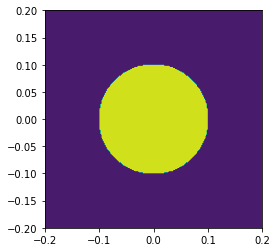

In [12]:
## physics and system params
lmbda = 1e-6
k = 2*pi/lmbda
a = .1 # aperture radius
z_prop = 10 # distance to propagate

## grid params
w = 2*a # grid half-width
pts = 201 #1025
x0pts, midpt, xx, yy = get_meshgrid(w, pts)
rr = sqrt(xx**2 + yy**2)
# print('rr.shape =', rr.shape)

mask = circ_mask(rr, a)

fig, ax = figax()
ax.contourf(x0pts, x0pts, mask)

In [13]:
model = RS(k, w, mask)

In [15]:
# approximate the output plane scale of interest as we
# would with an FFT
xsteps = 20
x1pts = array([i*1/(x0pts[1]-x0pts[0])*lmbda*z_prop/(2*pts) 
               for i in linspace(0, pts/4, xsteps)])
y1 = 0

field2_slice = zeros(xsteps, complex)

for i in range(xsteps):
    
    t0 = time()
    field2_slice[i] = model.field2_at_pt(x1pts[i],y1,z_prop)
    print(f"completed step {i} in time {time()-t0}")

completed step 0 in time 81.22766208648682
completed step 1 in time 84.6977972984314
completed step 2 in time 88.75531792640686
completed step 3 in time 86.76461791992188
completed step 4 in time 69.33312511444092
completed step 5 in time 59.75173044204712
completed step 6 in time 116.31767439842224
completed step 7 in time 85.78537702560425
completed step 8 in time 97.03440594673157
completed step 9 in time 107.79533672332764
completed step 10 in time 102.99765944480896
completed step 11 in time 87.46037864685059
completed step 12 in time 78.25801205635071
completed step 13 in time 70.81332492828369
completed step 14 in time 74.13667869567871
completed step 15 in time 85.521249294281
completed step 16 in time 90.6594250202179
completed step 17 in time 118.51889085769653
completed step 18 in time 109.95431518554688
completed step 19 in time 68.00891470909119


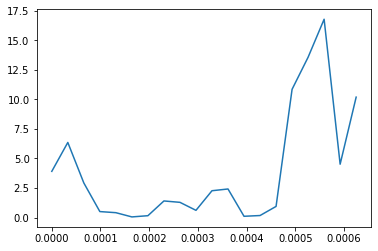

In [17]:
plt.plot(x1pts,abs(field2_slice)**2)

## test with circular aperture
Fresnel diffraction with FFT

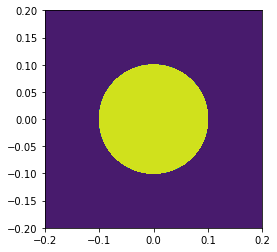

In [21]:
## physics and system params
lmbda = 1e-6
k = 2*pi/lmbda
a = .1 # aperture radius
z_prop = 10 # distance to propagate

## grid params
w = 2*a # grid half-width
pts = 1001 #1025
x0pts, midpt, xx, yy = get_meshgrid(w, pts)
rr = sqrt(xx**2 + yy**2)
# print('rr.shape =', rr.shape)

mask = circ_mask(rr, a)

fig, ax = figax()
ax.contourf(x0pts, x0pts, mask)

In [22]:
## compute 2D fft to get the Fourier plane field

padding = int(pts-1/2)
mask = zero_pad(mask, padding)
rr = zero_pad(rr, padding)

field1 = fftshift(fft2(ifftshift(mask)))

field1 = unpad(field1, padding)
mask = unpad(mask, padding)
rr = unpad(rr, padding)

I1 = conjugate(field1)*field1
I1 /= amax(I1)
I1x = justify(I1[midpt,:])

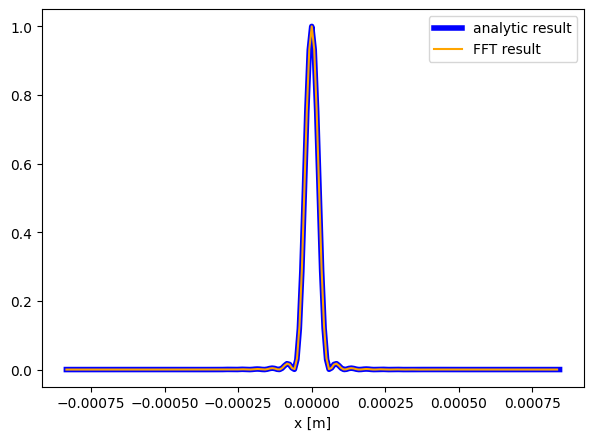

In [23]:
## plot the 1D fft

plt.close()
fig,ax = plt.subplots(figsize=(7,5))
fig.dpi=100

x1pts = array([i*1/(x0pts[1]-x0pts[0])*lmbda*z_prop/(2*padding+pts) for i in linspace(-pts/2, pts/2, pts)])

start = 400
stop = len(x1pts) - start

# plot the analytic result, up to constant scaling factor
I1_func = lambda x: (j1(a*x*k/z_prop)/x)**2
x1_pts = linspace(x1pts[start],x1pts[stop],200) # essentially the same as x1pts but omits x=0
I1_analytic = I1_func(x1_pts)
I1_analytic /= max(I1_analytic)
ax.plot(x1_pts, I1_analytic, label='analytic result', color='blue',linewidth=4)
# ax.set_title('Circular apperture diffraction intensity')

# plot the fft result
ax.plot(x1pts[start:stop], real(I1x)[start:stop], label='FFT result',color='orange')

ax.set_xlabel(r'x [m]')
# ax.set_xlim(-0.002,0.002)

ax.legend(loc='upper right')

# plt.savefig('airy_disk_fft_verification.png', bbox_inches='tight')